In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict, LeaveOneOut
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler
import warnings
from sklearn.model_selection import learning_curve

# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("hyperthyroidism3_FinalDataSet_April.csv", encoding='latin-1')
df.dropna(inplace=True)

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values  


In [3]:
df.head()

,aphp,nhph,tertiary_hp,secondary_hp,age,gender,height,weight,bmi,marital_status,...,nephrolithiasis,bone_specific_alp,corrected_calcium_by_albumin,serum_calcium_phosphorus_ratio,pf_index,alp_combined_with_cl_po4,third_surgery_pathology_report,fourth_surgery_pathology_report,triglycerides,hdl_cholesterol
0,0,0,0,0,0,-1,0,0,0.0,0,...,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,0,0,0,0,60,1,0,0,0.0,1,...,0,0.0,11.2,2.8,147.0,0.0,0,0,0,0
2,0,0,0,0,0,-1,0,0,0.0,0,...,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,0,0,0,0,0,-1,0,0,0.0,0,...,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0
4,1,0,0,0,55,1,170,73,0.0,1,...,0,0.0,12.1,4.4,413.0,0.0,0,0,0,0


In [4]:


import time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_classifier = DecisionTreeClassifier()
start_time = time.time()
dt_classifier.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")


Training time: 0.0 seconds


## Splitting & Using DT


## Using Evaluation Metrics

Accuracy =  88.0 %
Precision =  0.8770799785292538
Recall =  0.881447963800905
F1-score =  0.8786189534256428


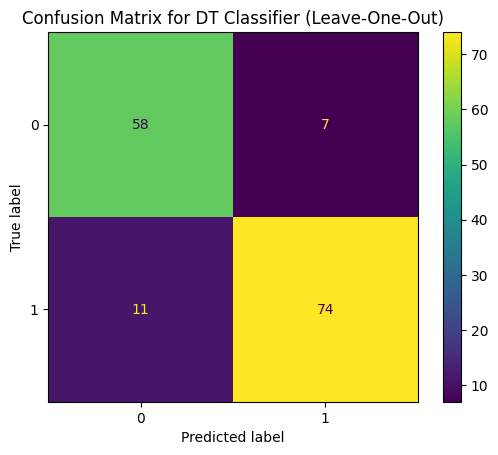

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.89      0.87        65
           1       0.91      0.87      0.89        85

    accuracy                           0.88       150
   macro avg       0.88      0.88      0.88       150
weighted avg       0.88      0.88      0.88       150



In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print("Accuracy = ", accuracy_score(y_test, y_pred) * 100, "%")
print("Precision = ", precision_score(y_test, y_pred,average='macro'))
print("Recall = ", recall_score(y_test, y_pred,average='macro'))
print("F1-score = ", f1_score(y_test, y_pred,average='macro'))
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for DT Classifier (Leave-One-Out)')
plt.show()
# Using classification report too
print("Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



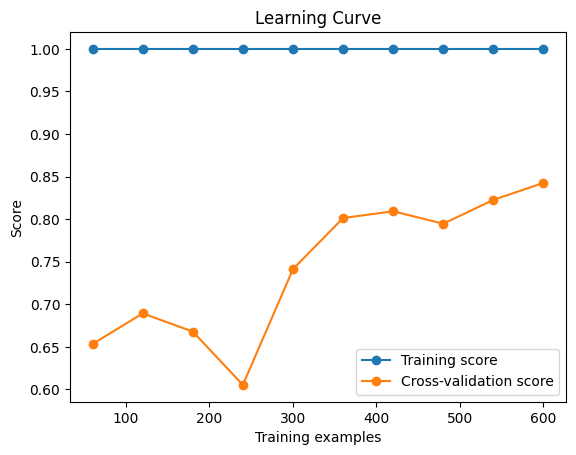

In [6]:
train_sizes, train_scores, test_scores = learning_curve(decision_tree, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()


--- Model Training (Decision Tree) ---
Training Wall Time: 0.0000 seconds
Training CPU Time (User): 0.0000 seconds
Training CPU Time (System): 0.0000 seconds
Memory RSS during/after training: 202.53 MB

--- Model Prediction (Decision Tree) ---
Prediction Wall Time (for 150 samples): 0.0000 seconds
Prediction CPU Time (User): 0.0000 seconds
Prediction CPU Time (System): 0.0000 seconds

--- Model Evaluation (Decision Tree) ---
Accuracy = 88.00 %
Precision (Macro) = 0.8772
Recall (Macro) = 0.8796
F1-score (Macro) = 0.8782

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        65
           1       0.90      0.88      0.89        85

    accuracy                           0.88       150
   macro avg       0.88      0.88      0.88       150
weighted avg       0.88      0.88      0.88       150


--- Model Complexity (Decision Tree) ---
Maximum Depth of the Tree: 9
Total Number of Nodes in the Tree: 61
Total Number o

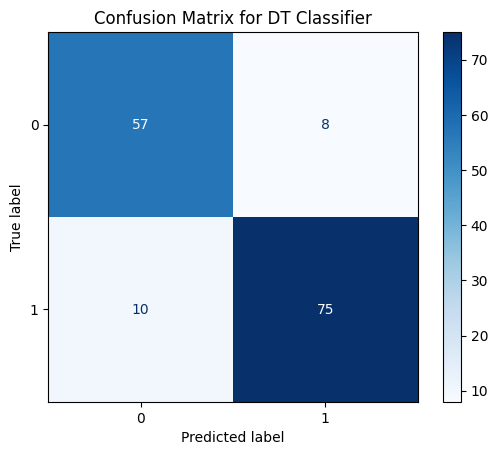


Displaying Learning Curve...


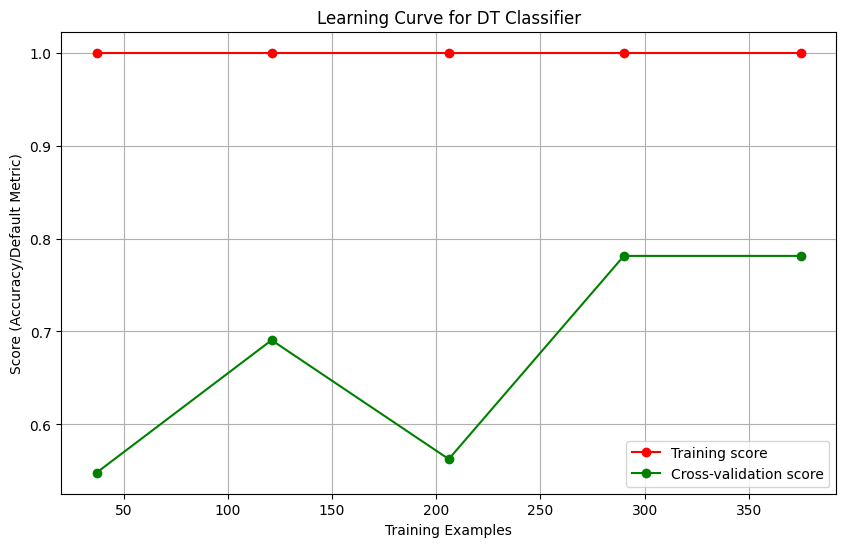


Displaying Feature Importances...


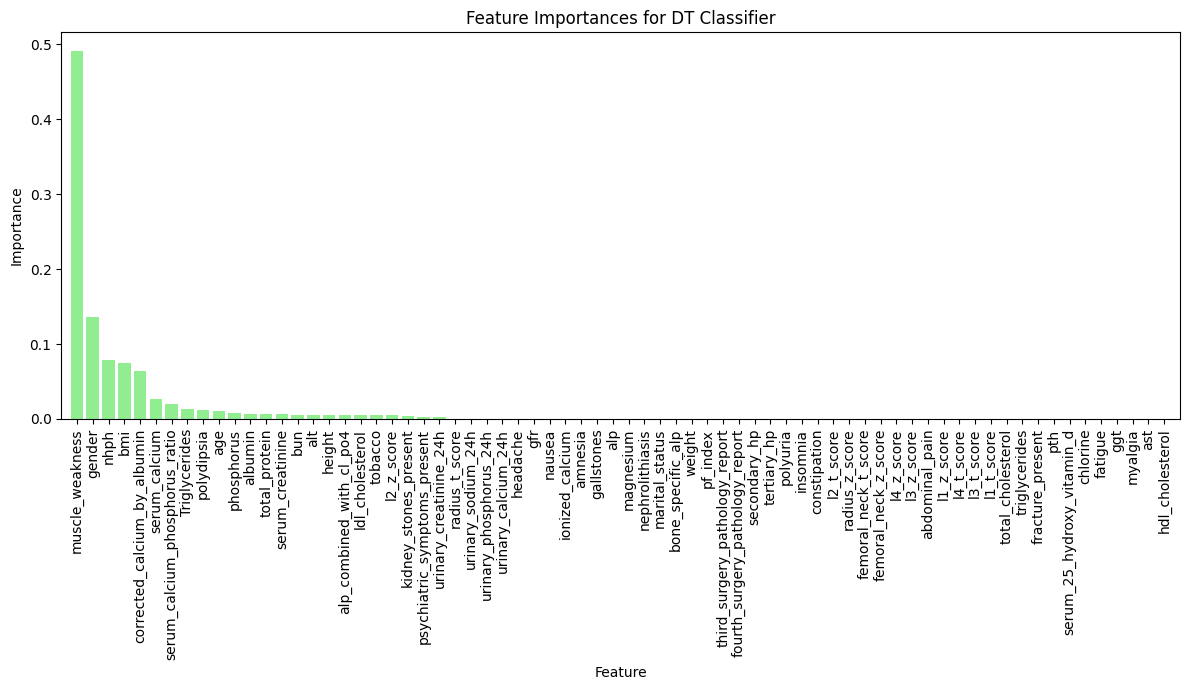


Displaying Decision Tree Structure...


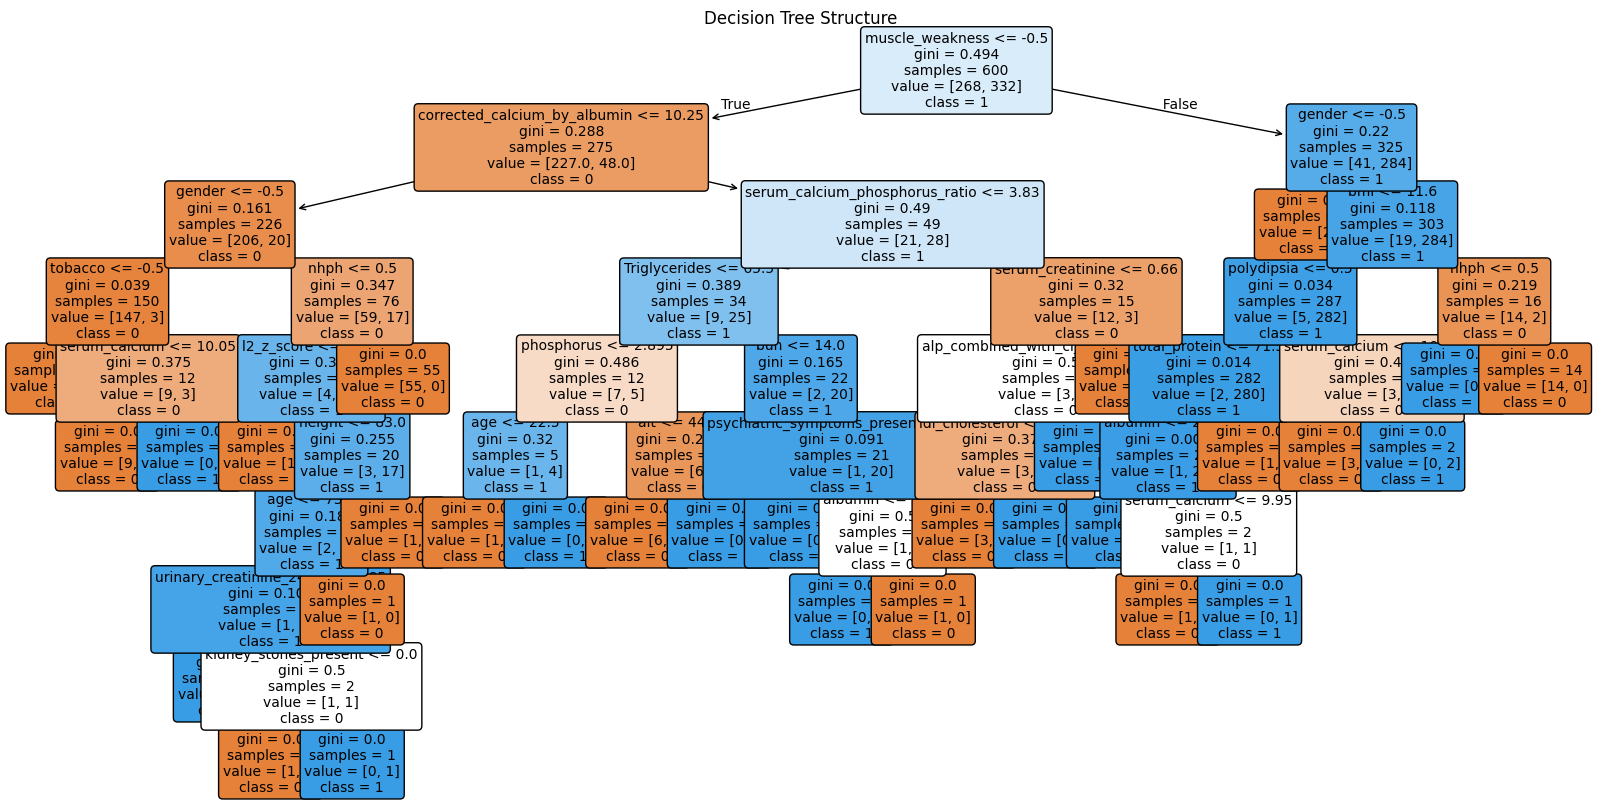


--- Analysis Complete ---


In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import warnings
import sys # For model object size

# Attempt to import psutil for CPU and memory stats
try:
    import psutil
    psutil_available = True
    process = psutil.Process() # Get current process
except ImportError:
    psutil_available = False
    print("psutil library not found. CPU and memory usage stats will not be available.")
    print("To install psutil, run: pip install psutil")

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree # Added plot_tree
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

# --- 1. Load Data ---
# !!! IMPORTANT: Make sure this path is correct for your system !!!
# The user provided "hyperthyroidism3_FinalDataSet_April.csv"
df = pd.read_csv(r"C:\Users\musab\desktop\ht\htOld\dataset\hyperthyroidism3_FinalDataSet_April.csv", encoding='latin-1')

df.dropna(inplace=True)

if df.empty:
    print("DataFrame is empty after dropping NaNs. Exiting.")
    sys.exit()

# Assuming the first column is the target and the rest are features
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

# Convert feature names to strings, handle potential non-string column names
feature_names = [str(col) for col in df.columns[1:]]
# Convert class names from y_train to strings for plot_tree
class_names = [str(cls) for cls in np.unique(y)]


# --- 2. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3. Initialize Model ---
# Using DecisionTreeClassifier as requested
dt_classifier = DecisionTreeClassifier(random_state=42) # Added random_state for reproducibility

# --- 4. Train Model and Measure Resources ---
print("\n--- Model Training (Decision Tree) ---")
training_start_time_wall = time.time()
if psutil_available:
    cpu_times_before_train = process.cpu_times()
    mem_info_before_train = process.memory_info().rss

dt_classifier.fit(X_train, y_train)

training_end_time_wall = time.time()
if psutil_available:
    cpu_times_after_train = process.cpu_times()
    mem_info_after_train = process.memory_info().rss

training_time_wall = training_end_time_wall - training_start_time_wall
print(f"Training Wall Time: {training_time_wall:.4f} seconds")

if psutil_available:
    training_cpu_time_user = cpu_times_after_train.user - cpu_times_before_train.user
    training_cpu_time_system = cpu_times_after_train.system - cpu_times_before_train.system
    print(f"Training CPU Time (User): {training_cpu_time_user:.4f} seconds")
    print(f"Training CPU Time (System): {training_cpu_time_system:.4f} seconds")
    print(f"Memory RSS during/after training: {mem_info_after_train / (1024**2):.2f} MB")

# --- 5. Make Predictions and Measure Resources ---
print("\n--- Model Prediction (Decision Tree) ---")
prediction_start_time_wall = time.time()
if psutil_available:
    cpu_times_before_predict = process.cpu_times()

y_pred = dt_classifier.predict(X_test)

prediction_end_time_wall = time.time()
if psutil_available:
    cpu_times_after_predict = process.cpu_times()

prediction_time_wall = prediction_end_time_wall - prediction_start_time_wall
print(f"Prediction Wall Time (for {len(X_test)} samples): {prediction_time_wall:.4f} seconds")

if psutil_available:
    prediction_cpu_time_user = cpu_times_after_predict.user - cpu_times_before_predict.user
    prediction_cpu_time_system = cpu_times_after_predict.system - cpu_times_before_predict.system
    print(f"Prediction CPU Time (User): {prediction_cpu_time_user:.4f} seconds")
    print(f"Prediction CPU Time (System): {prediction_cpu_time_system:.4f} seconds")

# --- 6. Evaluate Model ---
print("\n--- Model Evaluation (Decision Tree) ---")
accuracy = accuracy_score(y_test, y_pred) * 100
# Added zero_division=0 to handle cases with no predictions for a class in a batch
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print(f"Accuracy = {accuracy:.2f} %")
print(f"Precision (Macro) = {precision:.4f}")
print(f"Recall (Macro) = {recall:.4f}")
print(f"F1-score (Macro) = {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# --- 7. Model Complexity Statistics ---
print("\n--- Model Complexity (Decision Tree) ---")
tree_object = dt_classifier.tree_

if tree_object:
    max_depth = tree_object.max_depth
    node_count = tree_object.node_count
    n_leaves = tree_object.n_leaves
    print(f"Maximum Depth of the Tree: {max_depth}")
    print(f"Total Number of Nodes in the Tree: {node_count}")
    print(f"Total Number of Leaves in the Tree: {n_leaves}")
else:
    print("Tree object not available. Model might not have been fit.")


# Estimating model size
model_size_bytes = sys.getsizeof(dt_classifier)
if tree_object: # Add size of the tree object itself if it exists
    model_size_bytes += sys.getsizeof(tree_object)

print(f"Estimated Model Object Size in Memory: {model_size_bytes / (1024):.2f} KB ({model_size_bytes / (1024**2):.2f} MB)")
if psutil_available:
    current_process_memory_rss = process.memory_info().rss
    print(f"Current Process RSS Memory: {current_process_memory_rss / (1024**2):.2f} MB")
    current_process_memory_vms = process.memory_info().vms
    print(f"Current Process VMS Memory: {current_process_memory_vms / (1024**2):.2f} MB")

# --- 8. Visualizations ---

# Confusion Matrix
print("\nDisplaying Confusion Matrix...")
try:
    if len(y_test) > 0 and len(y_pred) > 0:
        unique_labels_train = np.unique(y_train)
        unique_labels_test = np.unique(y_test)
        all_unique_labels = np.unique(np.concatenate((unique_labels_train, unique_labels_test, np.unique(y_pred))))

        conf_matrix = confusion_matrix(y_test, y_pred, labels=all_unique_labels if len(all_unique_labels) > 0 else None)
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=all_unique_labels if len(all_unique_labels) > 0 else ['N/A'])
        disp.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix for DT Classifier') # Corrected title
        plt.show()
    else:
        print("Skipping Confusion Matrix: y_test or y_pred is empty.")
except Exception as e:
    print(f"Could not plot Confusion Matrix: {e}")

# Learning Curve
print("\nDisplaying Learning Curve...")
try:
    if len(y) >= 5: # Minimum samples for cv=5 (or less if fewer unique classes)
        n_splits_cv = min(5, len(np.unique(y))) # StratifiedKFold is default
        if n_splits_cv < 2:
            print(f"Skipping Learning Curve: Not enough unique classes in target variable for {n_splits_cv} splits (min 2 required).")
        else:
            train_sizes, train_scores, test_scores = learning_curve(
                dt_classifier, X, y, cv=n_splits_cv,
                n_jobs=-1, # Use all processors
                train_sizes=np.linspace(0.1, 1.0, 5) # Fewer points for faster plotting
            )
            plt.figure(figsize=(10, 6))
            plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
            plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
            plt.xlabel("Training Examples")
            plt.ylabel("Score (Accuracy/Default Metric)")
            plt.title("Learning Curve for DT Classifier")
            plt.legend(loc="best")
            plt.grid(True)
            plt.show()
    else:
        print("Skipping Learning Curve: Not enough samples in X or y for cross-validation.")
except Exception as e:
    print(f"Could not plot Learning Curve: {e}")


# Feature Importances
print("\nDisplaying Feature Importances...")
if hasattr(dt_classifier, 'feature_importances_'):
    importances = dt_classifier.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(12, 7))
    plt.title("Feature Importances for DT Classifier")
    plt.bar(range(X.shape[1]), importances[indices], color="lightgreen", align="center")
    if 'feature_names' in locals() and len(feature_names) == X.shape[1]:
        plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
    else:
        plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.ylabel("Importance")
    plt.xlabel("Feature")
    plt.tight_layout()
    plt.show()
else:
    print("Feature importances not available for this classifier.")

# Plot Decision Tree Structure
print("\nDisplaying Decision Tree Structure...")
if tree_object: # Check if tree is available
    plt.figure(figsize=(20,10)) # Adjust figure size as needed, can be very large for deep trees
    try:
        plot_tree(dt_classifier,
                  feature_names=feature_names, # Use actual feature names
                  class_names=class_names, # Use actual class names
                  filled=True,
                  rounded=True,
                  proportion=False, # Shows counts instead of proportions
                  fontsize=10) # Adjust font size
        plt.title("Decision Tree Structure")
        plt.show()
    except Exception as e:
        print(f"Could not plot tree: {e}. Tree might be too large or feature/class names mismatch.")
        print("Consider limiting tree depth (e.g., max_depth in DecisionTreeClassifier) for visualization if it's too complex.")
else:
    print("Skipping tree plot: Model not fit or tree object not found.")

print("\n--- Analysis Complete ---")



--- Model Training (Decision Tree) ---
Training Wall Time: 0.0176 seconds
Training CPU Time (User): 0.0156 seconds
Training CPU Time (System): 0.0000 seconds
Memory RSS during/after training: 214.43 MB

--- Model Prediction (Decision Tree) ---
Prediction Wall Time (for 155 samples): 0.0000 seconds
Prediction CPU Time (User): 0.0000 seconds
Prediction CPU Time (System): 0.0000 seconds

--- Model Evaluation (Decision Tree) ---
Accuracy = 93.55 %
Precision (Macro) = 0.9352
Recall (Macro) = 0.9359
F1-score (Macro) = 0.9354

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        74
           1       0.95      0.93      0.94        81

    accuracy                           0.94       155
   macro avg       0.94      0.94      0.94       155
weighted avg       0.94      0.94      0.94       155


--- Model Complexity (Decision Tree) ---
Maximum Depth of the Tree: 10
Total Number of Nodes in the Tree: 63
Total Number 

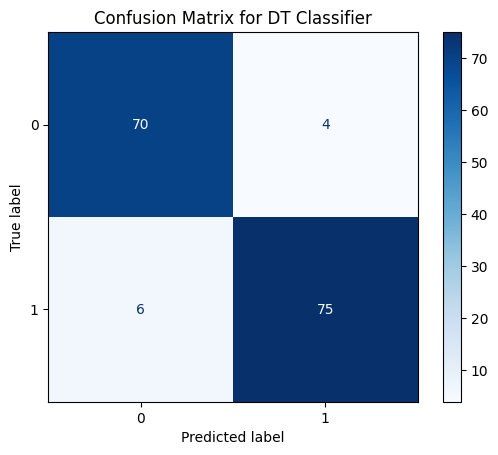


Displaying Learning Curve...


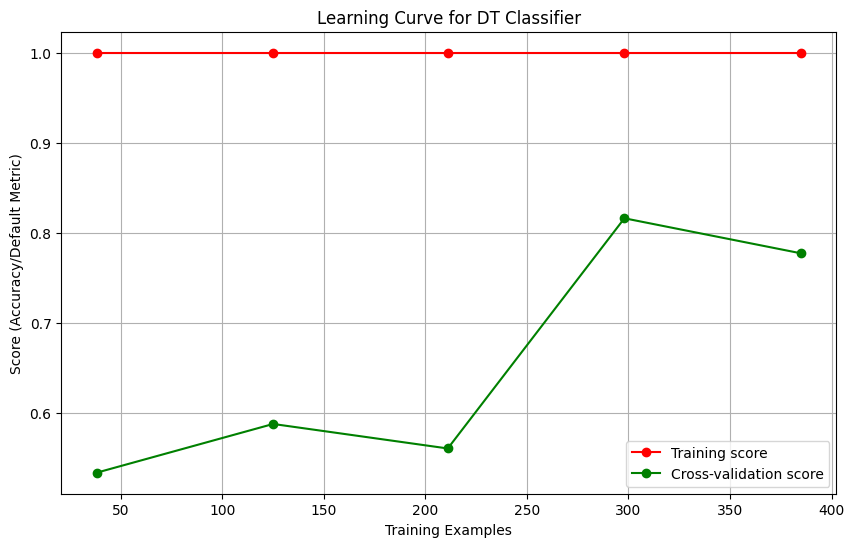


Displaying Feature Importances...


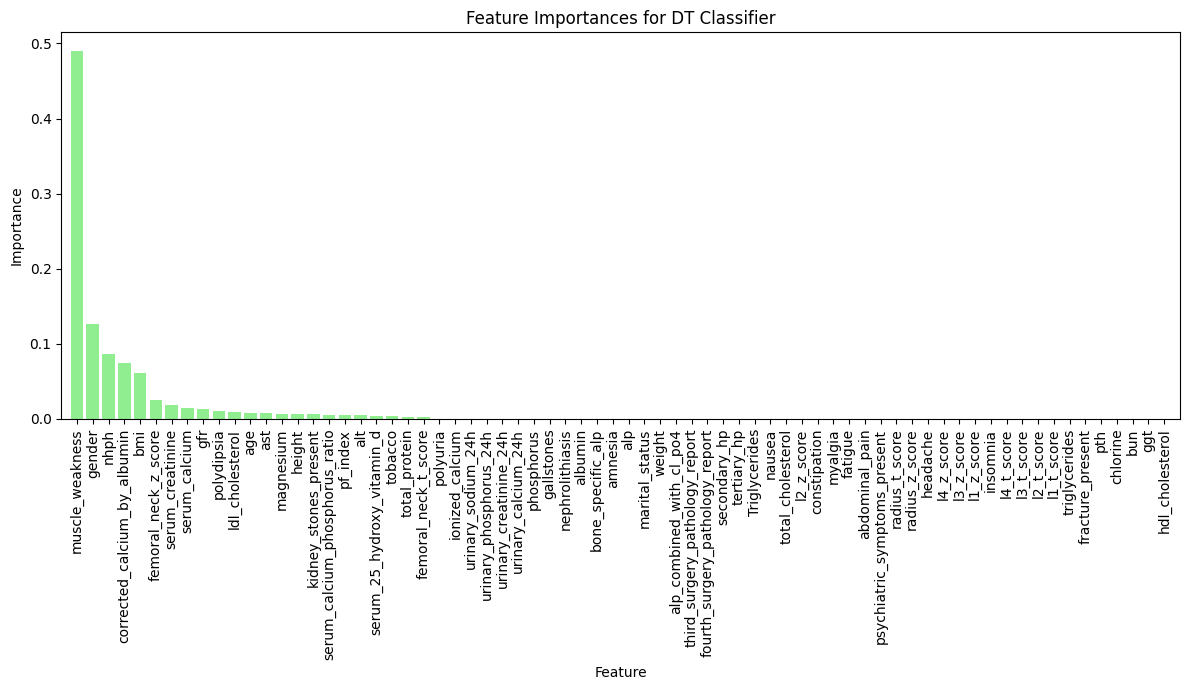


Displaying Decision Tree Structure...


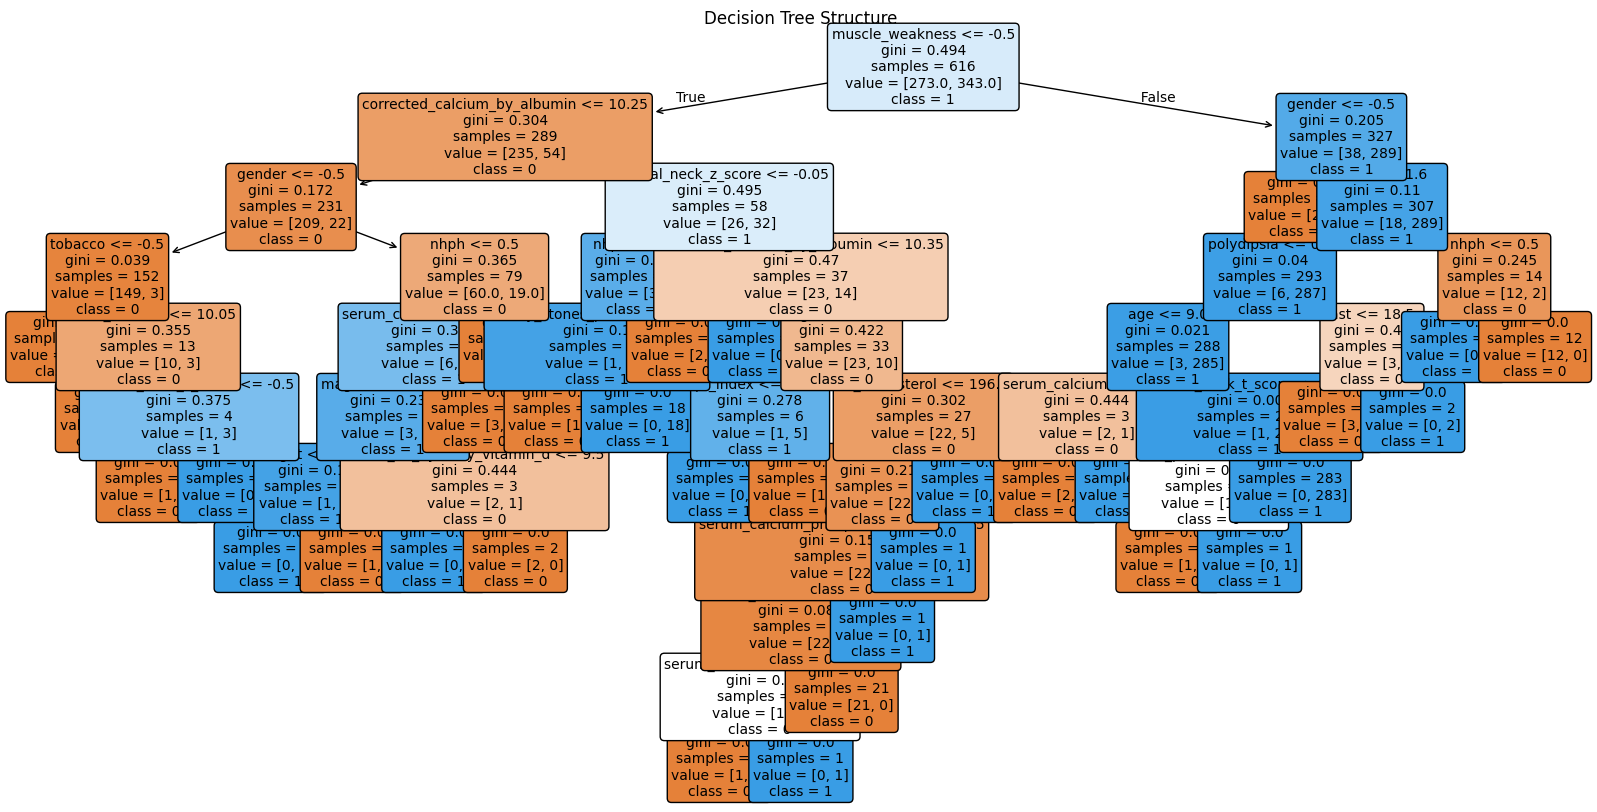


--- Generating Visualizations for Collected Metrics ---


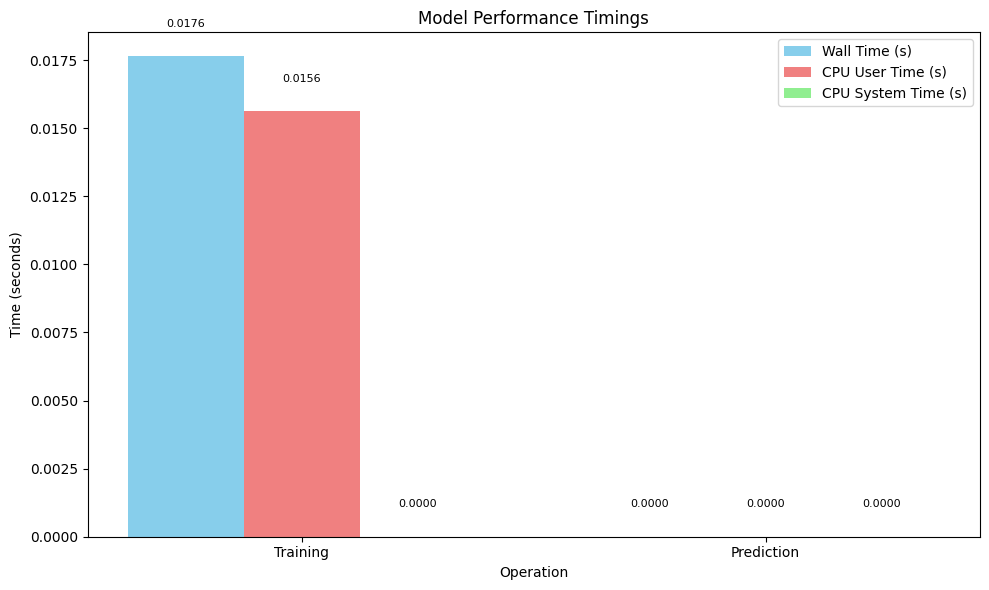

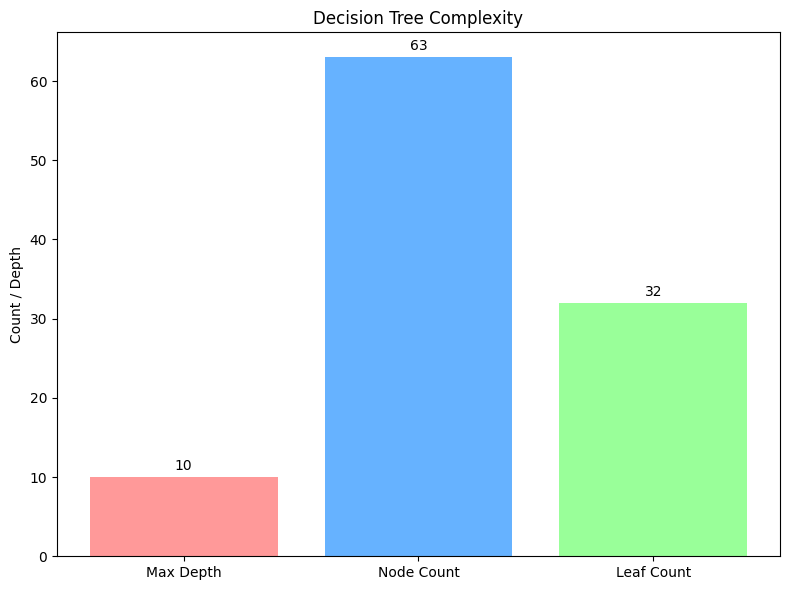

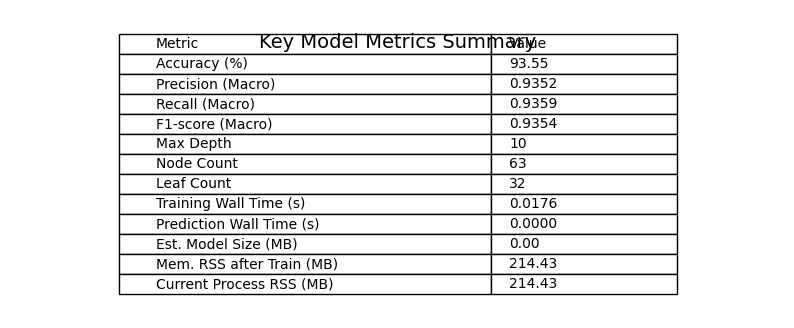


--- Analysis Complete ---


In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import warnings
import sys # For model object size

# Attempt to import psutil for CPU and memory stats
try:
    import psutil
    psutil_available = True
    process = psutil.Process() # Get current process
except ImportError:
    psutil_available = False
    print("psutil library not found. CPU and memory usage stats will not be available.")
    print("To install psutil, run: pip install psutil")

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree # Added plot_tree
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

# --- 0. Initialize Metrics Storage ---
# Dictionary to store all metrics for later visualization
all_metrics = {}

# --- 1. Load Data ---
# !!! IMPORTANT: Make sure this path is correct for your system !!!
# The user provided "hyperthyroidism3_FinalDataSet_April.csv"
df = pd.read_csv(r"C:\Users\musab\desktop\ht\htOld\dataset\hyperthyroidism3_FinalDataSet_April.csv", encoding='latin-1')

if df.empty:
    print("DataFrame is empty after dropping NaNs. Exiting.")
    sys.exit()

# Assuming the first column is the target and the rest are features
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

# Convert feature names to strings, handle potential non-string column names
feature_names = [str(col) for col in df.columns[1:]]
# Convert class names from y_train to strings for plot_tree
class_names = [str(cls) for cls in np.unique(y)]


# --- 2. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3. Initialize Model ---
# Using DecisionTreeClassifier as requested
dt_classifier = DecisionTreeClassifier(random_state=42) # Added random_state for reproducibility

# --- 4. Train Model and Measure Resources ---
print("\n--- Model Training (Decision Tree) ---")
training_start_time_wall = time.time()
if psutil_available:
    cpu_times_before_train = process.cpu_times()
    mem_info_before_train = process.memory_info().rss

dt_classifier.fit(X_train, y_train)

training_end_time_wall = time.time()
if psutil_available:
    cpu_times_after_train = process.cpu_times()
    mem_info_after_train = process.memory_info().rss

all_metrics['training_wall_time'] = training_end_time_wall - training_start_time_wall
print(f"Training Wall Time: {all_metrics['training_wall_time']:.4f} seconds")

if psutil_available:
    all_metrics['training_cpu_time_user'] = cpu_times_after_train.user - cpu_times_before_train.user
    all_metrics['training_cpu_time_system'] = cpu_times_after_train.system - cpu_times_before_train.system
    all_metrics['memory_rss_after_training_mb'] = mem_info_after_train / (1024**2)
    print(f"Training CPU Time (User): {all_metrics['training_cpu_time_user']:.4f} seconds")
    print(f"Training CPU Time (System): {all_metrics['training_cpu_time_system']:.4f} seconds")
    print(f"Memory RSS during/after training: {all_metrics['memory_rss_after_training_mb']:.2f} MB")
else: # Default values if psutil not available
    all_metrics['training_cpu_time_user'] = 0
    all_metrics['training_cpu_time_system'] = 0
    all_metrics['memory_rss_after_training_mb'] = 0


# --- 5. Make Predictions and Measure Resources ---
print("\n--- Model Prediction (Decision Tree) ---")
prediction_start_time_wall = time.time()
if psutil_available:
    cpu_times_before_predict = process.cpu_times()

y_pred = dt_classifier.predict(X_test)

prediction_end_time_wall = time.time()
if psutil_available:
    cpu_times_after_predict = process.cpu_times()

all_metrics['prediction_wall_time'] = prediction_end_time_wall - prediction_start_time_wall
print(f"Prediction Wall Time (for {len(X_test)} samples): {all_metrics['prediction_wall_time']:.4f} seconds")

if psutil_available:
    all_metrics['prediction_cpu_time_user'] = cpu_times_after_predict.user - cpu_times_before_predict.user
    all_metrics['prediction_cpu_time_system'] = cpu_times_after_predict.system - cpu_times_before_predict.system
    print(f"Prediction CPU Time (User): {all_metrics['prediction_cpu_time_user']:.4f} seconds")
    print(f"Prediction CPU Time (System): {all_metrics['prediction_cpu_time_system']:.4f} seconds")
else: # Default values
    all_metrics['prediction_cpu_time_user'] = 0
    all_metrics['prediction_cpu_time_system'] = 0

# --- 6. Evaluate Model ---
print("\n--- Model Evaluation (Decision Tree) ---")
all_metrics['accuracy'] = accuracy_score(y_test, y_pred) * 100
all_metrics['precision_macro'] = precision_score(y_test, y_pred, average='macro', zero_division=0)
all_metrics['recall_macro'] = recall_score(y_test, y_pred, average='macro', zero_division=0)
all_metrics['f1_score_macro'] = f1_score(y_test, y_pred, average='macro', zero_division=0)

print(f"Accuracy = {all_metrics['accuracy']:.2f} %")
print(f"Precision (Macro) = {all_metrics['precision_macro']:.4f}")
print(f"Recall (Macro) = {all_metrics['recall_macro']:.4f}")
print(f"F1-score (Macro) = {all_metrics['f1_score_macro']:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# --- 7. Model Complexity Statistics ---
print("\n--- Model Complexity (Decision Tree) ---")
tree_object = dt_classifier.tree_

if tree_object:
    all_metrics['max_depth'] = tree_object.max_depth
    all_metrics['node_count'] = tree_object.node_count
    all_metrics['n_leaves'] = tree_object.n_leaves
    print(f"Maximum Depth of the Tree: {all_metrics['max_depth']}")
    print(f"Total Number of Nodes in the Tree: {all_metrics['node_count']}")
    print(f"Total Number of Leaves in the Tree: {all_metrics['n_leaves']}")
else:
    print("Tree object not available. Model might not have been fit.")
    all_metrics['max_depth'] = 0
    all_metrics['node_count'] = 0
    all_metrics['n_leaves'] = 0


# Estimating model size
model_size_bytes = sys.getsizeof(dt_classifier)
if tree_object: # Add size of the tree object itself if it exists
    model_size_bytes += sys.getsizeof(tree_object)
all_metrics['estimated_model_size_kb'] = model_size_bytes / 1024
all_metrics['estimated_model_size_mb'] = model_size_bytes / (1024**2)

print(f"Estimated Model Object Size in Memory: {all_metrics['estimated_model_size_kb']:.2f} KB ({all_metrics['estimated_model_size_mb']:.2f} MB)")

if psutil_available:
    all_metrics['current_process_rss_mb'] = process.memory_info().rss / (1024**2)
    all_metrics['current_process_vms_mb'] = process.memory_info().vms / (1024**2)
    print(f"Current Process RSS Memory: {all_metrics['current_process_rss_mb']:.2f} MB")
    print(f"Current Process VMS Memory: {all_metrics['current_process_vms_mb']:.2f} MB")
else:
    all_metrics['current_process_rss_mb'] = 0
    all_metrics['current_process_vms_mb'] = 0

# --- 8. Visualizations (Existing) ---

# Confusion Matrix
print("\nDisplaying Confusion Matrix...")
try:
    if len(y_test) > 0 and len(y_pred) > 0:
        unique_labels_train = np.unique(y_train)
        unique_labels_test = np.unique(y_test)
        all_unique_labels = np.unique(np.concatenate((unique_labels_train, unique_labels_test, np.unique(y_pred))))

        conf_matrix = confusion_matrix(y_test, y_pred, labels=all_unique_labels if len(all_unique_labels) > 0 else None)
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=all_unique_labels if len(all_unique_labels) > 0 else ['N/A'])
        disp.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix for DT Classifier') # Corrected title
        plt.show()
    else:
        print("Skipping Confusion Matrix: y_test or y_pred is empty.")
except Exception as e:
    print(f"Could not plot Confusion Matrix: {e}")

# Learning Curve
print("\nDisplaying Learning Curve...")
try:
    if len(y) >= 5: # Minimum samples for cv=5 (or less if fewer unique classes)
        n_splits_cv = min(5, len(np.unique(y))) # StratifiedKFold is default
        if n_splits_cv < 2:
            print(f"Skipping Learning Curve: Not enough unique classes in target variable for {n_splits_cv} splits (min 2 required).")
        else:
            train_sizes, train_scores, test_scores = learning_curve(
                dt_classifier, X, y, cv=n_splits_cv,
                n_jobs=-1, # Use all processors
                train_sizes=np.linspace(0.1, 1.0, 5) # Fewer points for faster plotting
            )
            plt.figure(figsize=(10, 6))
            plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
            plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
            plt.xlabel("Training Examples")
            plt.ylabel("Score (Accuracy/Default Metric)")
            plt.title("Learning Curve for DT Classifier")
            plt.legend(loc="best")
            plt.grid(True)
            plt.show()
    else:
        print("Skipping Learning Curve: Not enough samples in X or y for cross-validation.")
except Exception as e:
    print(f"Could not plot Learning Curve: {e}")


# Feature Importances
print("\nDisplaying Feature Importances...")
if hasattr(dt_classifier, 'feature_importances_'):
    importances = dt_classifier.feature_importances_
    indices = np.argsort(importances)[::-1]
    all_metrics['feature_importances'] = importances # Store for potential future use

    plt.figure(figsize=(12, 7))
    plt.title("Feature Importances for DT Classifier")
    plt.bar(range(X.shape[1]), importances[indices], color="lightgreen", align="center")
    if 'feature_names' in locals() and len(feature_names) == X.shape[1]:
        plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
    else:
        plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.ylabel("Importance")
    plt.xlabel("Feature")
    plt.tight_layout()
    plt.show()
else:
    print("Feature importances not available for this classifier.")
    all_metrics['feature_importances'] = []


# Plot Decision Tree Structure
print("\nDisplaying Decision Tree Structure...")
if tree_object: # Check if tree is available
    plt.figure(figsize=(20,10)) # Adjust figure size as needed, can be very large for deep trees
    try:
        plot_tree(dt_classifier,
                  feature_names=feature_names, # Use actual feature names
                  class_names=class_names, # Use actual class names
                  filled=True,
                  rounded=True,
                  proportion=False, # Shows counts instead of proportions
                  fontsize=10) # Adjust font size
        plt.title("Decision Tree Structure")
        plt.show()
    except Exception as e:
        print(f"Could not plot tree: {e}. Tree might be too large or feature/class names mismatch.")
        print("Consider limiting tree depth (e.g., max_depth in DecisionTreeClassifier) for visualization if it's too complex.")
else:
    print("Skipping tree plot: Model not fit or tree object not found.")

# --- 9. New Visualizations for Collected Metrics ---
print("\n--- Generating Visualizations for Collected Metrics ---")

# Plot 1: Performance Timings
fig_perf, ax_perf = plt.subplots(figsize=(10, 6))
time_categories = ['Training', 'Prediction']
wall_times = [all_metrics.get('training_wall_time', 0), all_metrics.get('prediction_wall_time', 0)]
cpu_user_times = [all_metrics.get('training_cpu_time_user', 0), all_metrics.get('prediction_cpu_time_user', 0)]
cpu_system_times = [all_metrics.get('training_cpu_time_system', 0), all_metrics.get('prediction_cpu_time_system', 0)]

bar_width = 0.25
index = np.arange(len(time_categories))

bar1 = ax_perf.bar(index - bar_width, wall_times, bar_width, label='Wall Time (s)', color='skyblue')
bar2 = ax_perf.bar(index, cpu_user_times, bar_width, label='CPU User Time (s)', color='lightcoral')
bar3 = ax_perf.bar(index + bar_width, cpu_system_times, bar_width, label='CPU System Time (s)', color='lightgreen')

ax_perf.set_xlabel('Operation')
ax_perf.set_ylabel('Time (seconds)')
ax_perf.set_title('Model Performance Timings')
ax_perf.set_xticks(index)
ax_perf.set_xticklabels(time_categories)
ax_perf.legend()
# Add value labels on top of bars
for bar_group in [bar1, bar2, bar3]:
    for bar in bar_group:
        yval = bar.get_height()
        ax_perf.text(bar.get_x() + bar.get_width()/2.0, yval + 0.001, f'{yval:.4f}', ha='center', va='bottom', fontsize=8) # Adjust offset if needed
fig_perf.tight_layout()
plt.show()


# Plot 2: Model Complexity
fig_comp, ax_comp = plt.subplots(figsize=(8, 6))
complexity_metrics_names = ['Max Depth', 'Node Count', 'Leaf Count']
complexity_values = [all_metrics.get('max_depth', 0), all_metrics.get('node_count', 0), all_metrics.get('n_leaves', 0)]

bars_comp = ax_comp.bar(complexity_metrics_names, complexity_values, color=['#FF9999', '#66B2FF', '#99FF99'])
ax_comp.set_ylabel('Count / Depth')
ax_comp.set_title('Decision Tree Complexity')
# Add value labels on top of bars
for bar in bars_comp:
    yval = bar.get_height()
    ax_comp.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, f'{int(yval)}', ha='center', va='bottom') # Display as integer
fig_comp.tight_layout()
plt.show()

# Plot 3: Summary Table of Key Metrics
fig_table, ax_table = plt.subplots(figsize=(10, 4)) # Adjust size as needed
ax_table.axis('tight')
ax_table.axis('off')

table_data = [
    ["Metric", "Value"],
    ["Accuracy (%)", f"{all_metrics.get('accuracy', 0):.2f}"],
    ["Precision (Macro)", f"{all_metrics.get('precision_macro', 0):.4f}"],
    ["Recall (Macro)", f"{all_metrics.get('recall_macro', 0):.4f}"],
    ["F1-score (Macro)", f"{all_metrics.get('f1_score_macro', 0):.4f}"],
    ["Max Depth", f"{all_metrics.get('max_depth', 0)}"],
    ["Node Count", f"{all_metrics.get('node_count', 0)}"],
    ["Leaf Count", f"{all_metrics.get('n_leaves', 0)}"],
    ["Training Wall Time (s)", f"{all_metrics.get('training_wall_time', 0):.4f}"],
    ["Prediction Wall Time (s)", f"{all_metrics.get('prediction_wall_time', 0):.4f}"],
    ["Est. Model Size (MB)", f"{all_metrics.get('estimated_model_size_mb', 0):.2f}"],
    ["Mem. RSS after Train (MB)", f"{all_metrics.get('memory_rss_after_training_mb', 0):.2f}"],
]
if psutil_available: # Only add these if psutil was used
     table_data.extend([
        ["Current Process RSS (MB)", f"{all_metrics.get('current_process_rss_mb', 0):.2f}"],
     ])


table = ax_table.table(cellText=table_data, colLabels=None, cellLoc='left', loc='center', colWidths=[0.4, 0.2])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2) # Adjust scale for better fit
ax_table.set_title('Key Model Metrics Summary', fontsize=14, y=0.85) # Adjust title position
plt.show()


print("\n--- Analysis Complete ---")
